Inladen van modules en df:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('US_Accidents_June20.csv')


Algemene explorative data

In [3]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

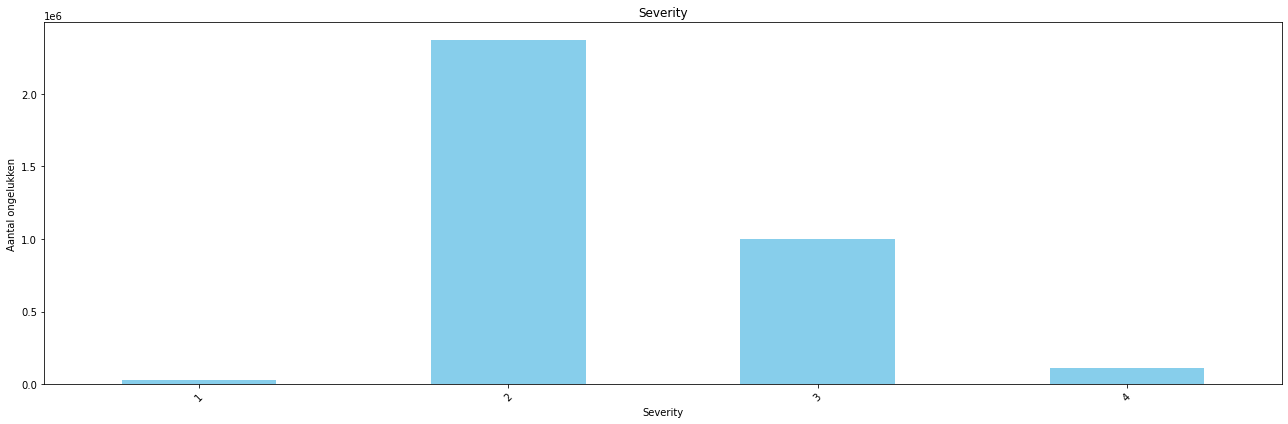

In [43]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

In [ ]:
# Boxplot van 'Severity' vs. 'Temperature(F)'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Boxplot van Severity vs. Temperature(F)')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

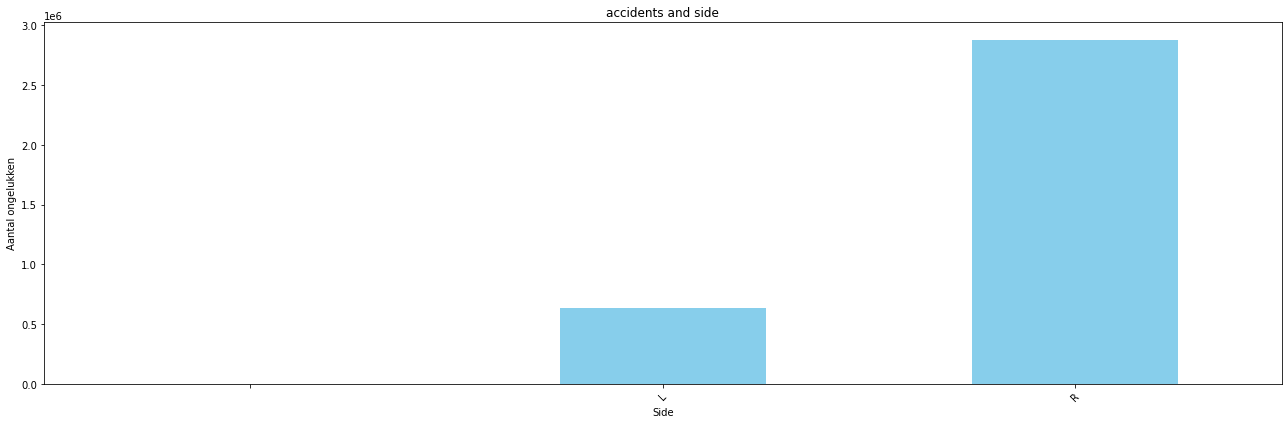

In [61]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Data op individuele staten (Quint & Doena)

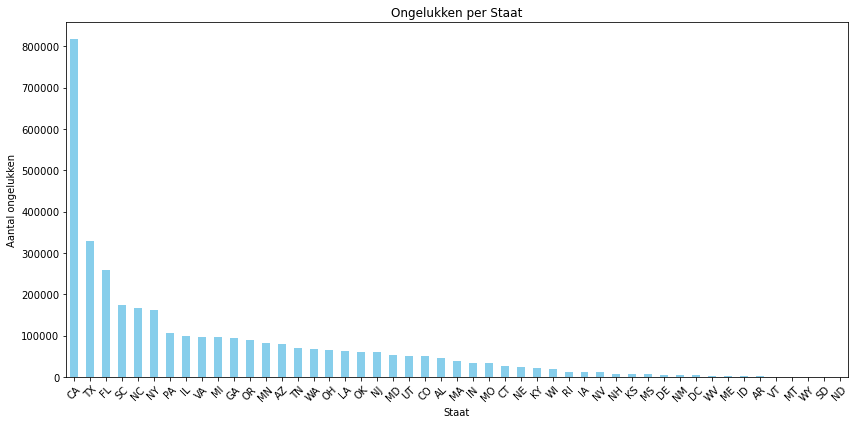

In [5]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



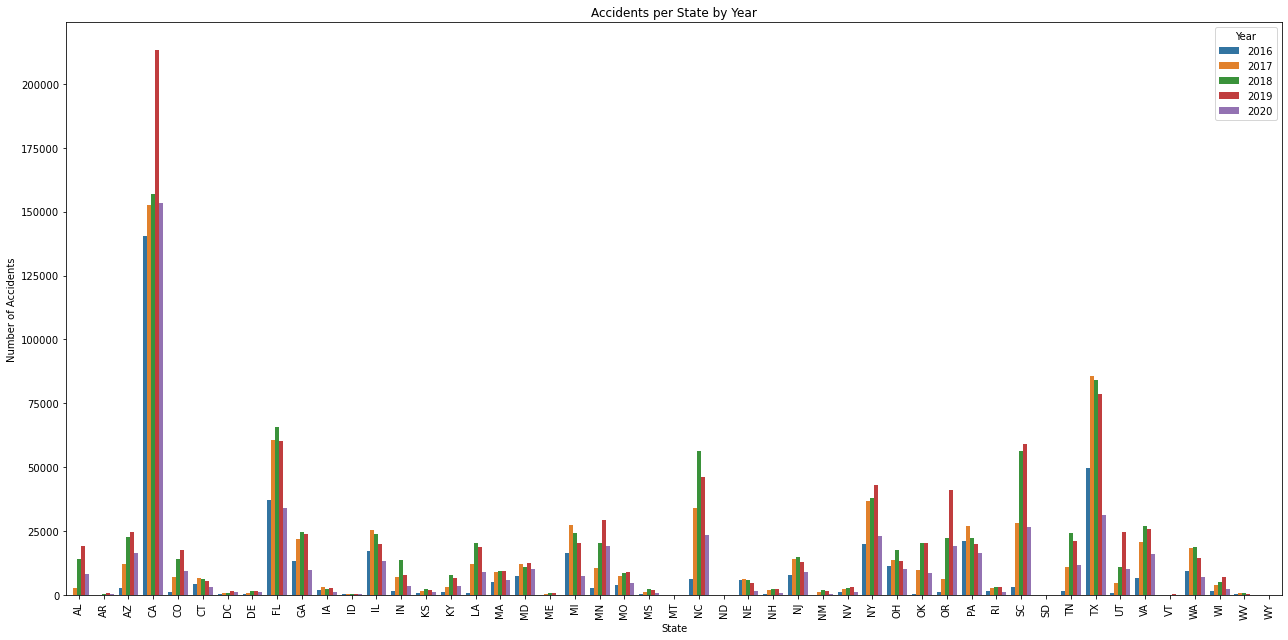

In [6]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

Where you live plays a key role in the average cost of car insurance. For instance, drivers in rural areas generally pay less than drivers in urban areas because there tends to be fewer cars on the road and fewer accidents. Motorists in neighborhoods prone to theft and vandalism or severe weather usually pay more than those in areas where crime and severe weather is less frequent.

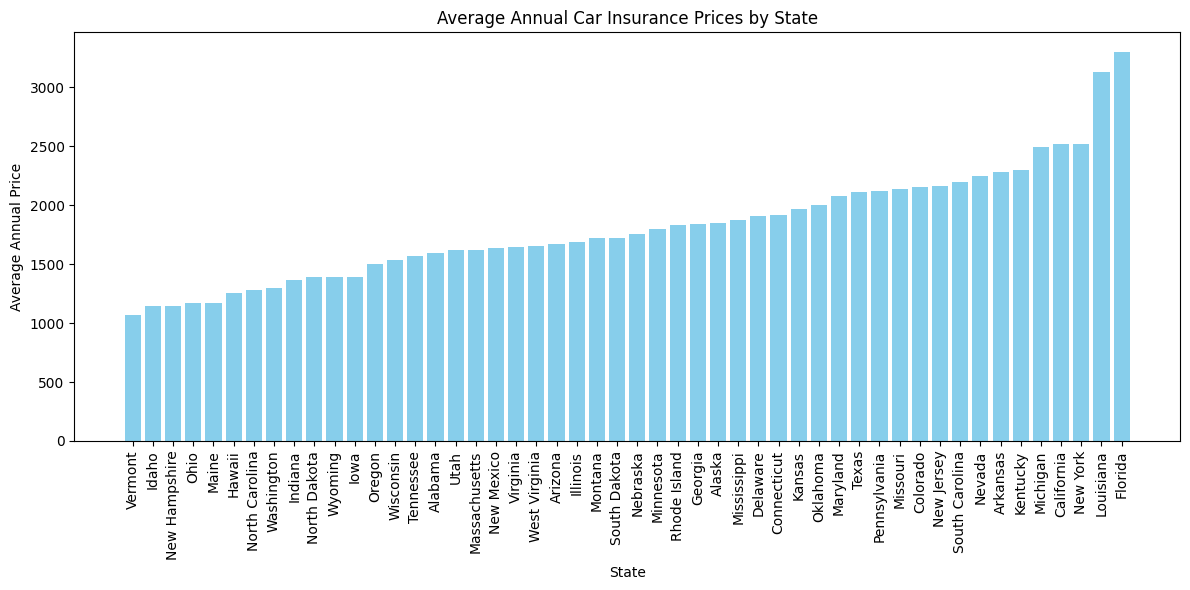

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('data-WUV8m.csv')

# Sort the DataFrame by the "Average Annual Price" column in ascending order
df_sorted = df.sort_values(by='Average annual full coverage cost')

# Create a bar chart to visualize the states from least expensive to most expensive
plt.figure(figsize=(12, 6))
plt.bar(df_sorted['State'], df_sorted['Average annual full coverage cost'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Average Annual Price')
plt.title('Average Annual Car Insurance Prices by State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()




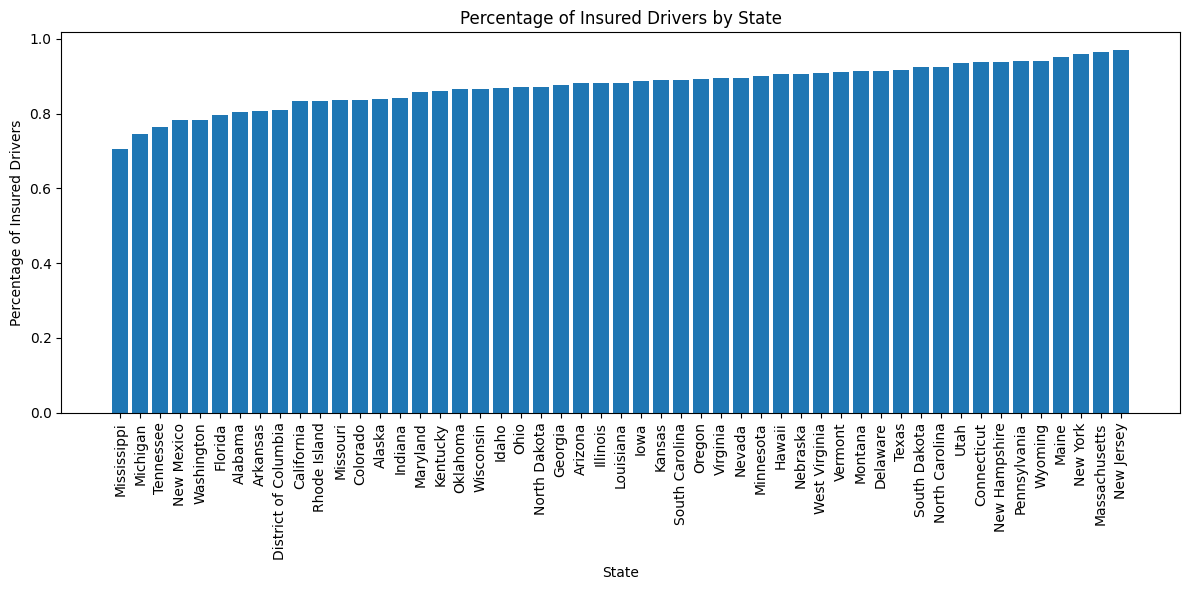

In [5]:
df = pd.read_excel('Data_(on)verzekered.xlsx')

plt.figure(figsize=(12, 6))
plt.bar(df['State'], df['insured'])
plt.xlabel('State')
plt.ylabel('Percentage of Insured Drivers')
plt.title('Percentage of Insured Drivers by State')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()

Least expensive states for full coverage auto insurance
Vermont: $1,066
Idaho: $1,143
New Hampshire: $1,149
Maine: $1,168
Ohio: $1,168
Most expensive states for full coverage auto insurance
Florida: $3,301
Louisiana: $3,128
New York: $2,523
California: $2,521
Michigan: $2,495

In [9]:
import pandas as pd

# Read the insured percentages data
insured_df = pd.read_excel('Data_(on)verzekered.xlsx')

# Read the average costs data
cost_df = pd.read_csv('data-WUV8m.csv')

# Merge the two DataFrames based on the 'State' column
merged_df = pd.merge(insured_df, cost_df, on='State')

# Now, merged_df contains both insured percentages and average costs data for each state
print(merged_df.head())


         State  uninsured  insured  Average annual full coverage cost
0  Mississippi      0.294    0.706                               1874
1     Michigan      0.255    0.745                               2495
2    Tennessee      0.237    0.763                               1573
3   New Mexico      0.218    0.782                               1639
4   Washington      0.217    0.783                               1298


In [18]:
import pandas as pd

# Calculate the average severity per state
average_severity_per_state = df.groupby("State")["Severity"].mean().reset_index()
average_severity_per_state.columns = ["State", "Average Severity"]

# Display the average severity per state
print(average_severity_per_state)


   State  Average Severity
0     AL          2.335171
1     AR          2.736083
2     AZ          2.174298
3     CA          2.290078
4     CO          2.542619
5     CT          2.621598
6     DC          2.504149
7     DE          2.390835
8     FL          2.369714
9     GA          2.655126
10    IA          2.635817
11    ID          2.339041
12    IL          2.392559
13    IN          2.489006
14    KS          2.601335
15    KY          2.505520
16    LA          2.213298
17    MA          2.399959
18    MD          2.612207
19    ME          2.123941
20    MI          2.459800
21    MN          2.350708
22    MO          2.633891
23    MS          2.492179
24    MT          2.693359
25    NC          2.158781
26    ND          2.772727
27    NE          2.174009
28    NH          2.226453
29    NJ          2.397552
30    NM          2.501358
31    NV          2.385512
32    NY          2.437989
33    OH          2.446877
34    OK          2.111661
35    OR          2.143006
3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


price = merged_df["Average Anual Cost"]
percentage_insured = merged_df["Percentage insured drivers"]
severity = df["Severity"]


plt.figure(figsize=(10, 6))
plt.scatter(percentage_insured, price, s=severity, alpha=0.5, cmap='viridis')
plt.xlabel("Percentage Insured Drivers")
plt.ylabel("Average Annual Cost")
plt.title("Average Annual Cost vs. Percentage Insured Drivers (Bubble Plot)")
plt.grid(True)
plt.colorbar(label="Severity")

# Show the plot
plt.show()


- Identify areas with a low frequency of accidents and lower accident severity
-Historical claims data to identify areas with a lower frequency of insurance claims
-Areas with a higher percentage of insured drivers may be more attractive for insurance coverage
-Areas with milder weather conditions may experience fewer weather-related accidents

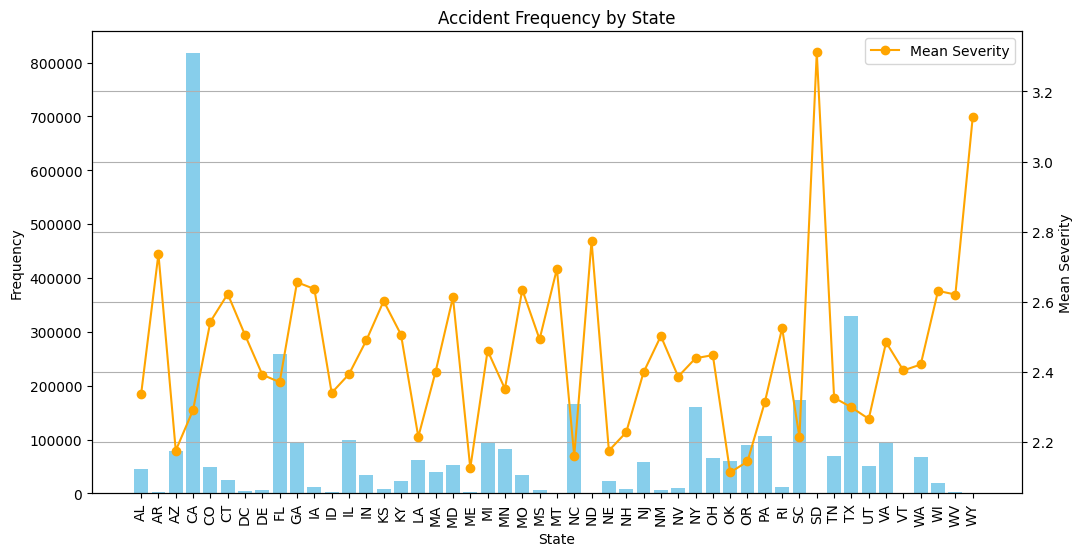

In [16]:
columns_to_keep = ["State", "Severity"]
filtered_df = df[columns_to_keep]

# Group the data by State and count the number of accidents (frequency)
grouped_data = filtered_df.groupby("State")["Severity"].count().reset_index()
grouped_data.columns = ["State", "Frequency"]

# Calculate the mean severity for each State
mean_severity = filtered_df.groupby("State")["Severity"].mean().reset_index()

# Create a bar plot for frequency
plt.figure(figsize=(12, 6))
plt.bar(grouped_data["State"], grouped_data["Frequency"], color="skyblue")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.title("Accident Frequency by State")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Create a secondary y-axis for severity
plt.twinx()
plt.plot(mean_severity["State"], mean_severity["Severity"], marker='o', color='orange', label="Mean Severity")
plt.ylabel("Mean Severity")
plt.legend(loc="upper right")

plt.grid(True)

# Show the plot
plt.show()

Liability coverage
Liability coverage is required in most US states as a legal requirement to drive a car. Liability insurance may help cover damages for injuries and property damage to others for which you become legally responsible resulting from a covered accident.

Collision insurance
Collision insurance may cover damage to your car after an accident involving another vehicle and may help to repair or replace a covered vehicle.

Comprehensive insurance
Comprehensive insurance can provide an extra level of coverage in the instance of an accident involving another vehicle. It may help pay for damage to your car due to incidents besides collisions, including vandalism, certain weather events and accidents with animals.

Uninsured motorist insurance
Uninsured motorist insurance can protect you and your car against uninsured drivers and hit-and-run accidents. This coverage is often paired with underinsured motorist insurance.

Underinsured motorist insurance
Many drivers choose to carry the minimum in liability coverage to save money, but this might not provide enough coverage. Underinsured motorist insurance can protect you in the event of an accident with a driver whose insurance is not enough to cover the costs.

Medical payments coverage
Medical costs following an accident can be very expensive. Medical payments coverage can help pay medical costs related to a covered accident, regardless of who is at fault.

Personal injury protection insurance
Personal injury protection insurance may cover certain medical expenses and loss of income resulting from a covered accident. Depending on the limits of a policy, personal injury protection could cover as much as 80% of medical and other expenses stemming from a covered accident.

Gap insurance
Car value can depreciate quickly, so an auto insurance settlement might not be enough to cover the cost of a loan. Gap insurance may help certain drivers cover the amount owed on a car loan after a total loss or theft.

Towing and labor insurance
Available if you already have comprehensive car insurance, towing and labor insurance may reimburse you for a tow and for the labor costs to repair your vehicle.

Rental reimbursement insurance
Figuring out how to get around after an accident can be expensive. Rental reimbursement insurance helps pay for a rental car if your vehicle cannot be driven after an accident.

Classic car insurance
Classic car insurance provides specialized coverage designed for the unique needs of vintage and classic car collectors. Find out if classic car insurance is right for you.

Analyze US_Accidents_Marsch23.csv

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df1 = pd.read_csv('US_Accidents_March23.csv')

In [3]:
print(df1.columns)
df1.info()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 

In [4]:
# Create a Boolean DataFrame where True represents missing values
missing_values = df1.isna()

# Count the number of missing values in each column
missing_counts = missing_values.sum()

# Filter out columns with no missing values
missing_counts = missing_counts[missing_counts > 0]

# Display the column names and their respective counts of missing values
print(missing_counts)

End_Lat                  3402762
End_Lng                  3402762
Description                    5
Street                     10869
City                         253
Zipcode                     1915
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


In [6]:
# Count the number of unique values in each column
unique_counts = df1.nunique()

# Display the count of unique values for each column
print(unique_counts)

ID                       7728394
Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
End_Lat                  1568172
End_Lng                  1605789
Distance(mi)               22382
Description              3761578
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Airport_Code                2045
Weather_Timestamp         941331
Temperature(F)               860
Wind_Chill(F)               1001
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Wind_Speed(mph)              184
Precipitation(in)            299
Weather_Condition            144
Amenity                        2
Bump      

In [15]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

print("Unique count of categorical features:")
for col_name in cat_names:
    if col_name in df1.columns:
        unique_count = df1[col_name].nunique()
        print(f"{col_name}: {unique_count}")
    else:
        print(f"{col_name} column not found in the DataFrame.")


Unique count of categorical features:
Side column not found in the DataFrame.
Country: 1
Timezone: 4
Amenity: 2
Bump: 2
Crossing: 2
Give_Way: 2
Junction: 2
No_Exit: 2
Railway: 2
Roundabout: 2
Station: 2
Stop: 2
Traffic_Calming: 2
Traffic_Signal: 2
Turning_Loop: 1
Sunrise_Sunset: 2
Civil_Twilight: 2
Nautical_Twilight: 2
Astronomical_Twilight: 2


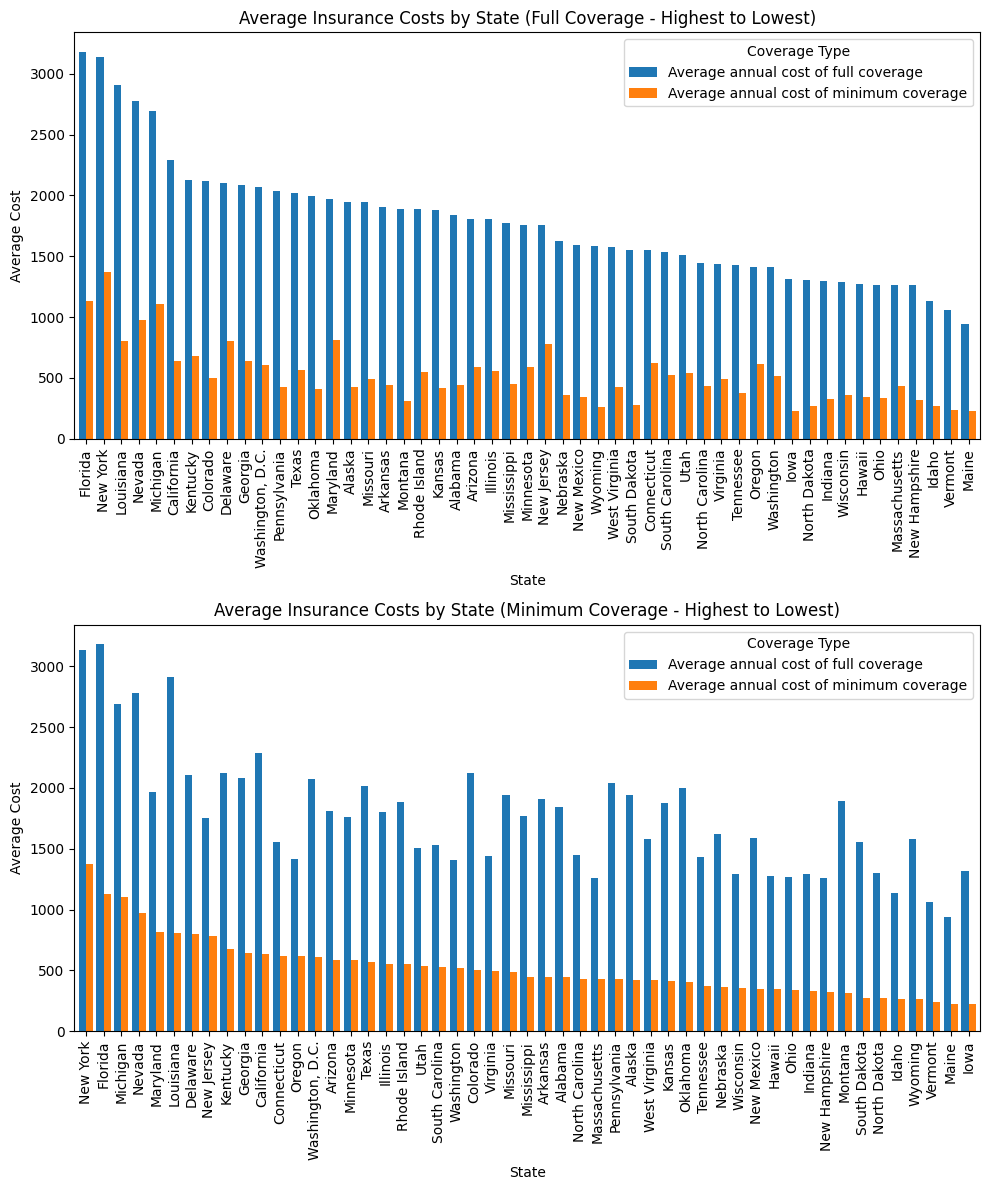

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

excel_file_path = 'Kosten verzekering.xlsx'  
df = pd.read_excel(excel_file_path)

df['Average annual cost of full coverage'] = df['Average annual cost of full coverage'].str.replace('[\$,]', '', regex=True).astype(float)
df['Average annual cost of minimum coverage'] = df['Average annual cost of minimum coverage'].str.replace('[\$,]', '', regex=True).astype(float)

df_full_sorted = df.sort_values(by='Average annual cost of full coverage', ascending=False)

df_min_sorted = df.sort_values(by='Average annual cost of minimum coverage', ascending=False)

df_full_sorted.set_index('State', inplace=True)
df_min_sorted.set_index('State', inplace=True)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  

df_full_sorted.plot(kind='bar', stacked=False, width=0.8, ax=ax1)
ax1.set_title('Average Insurance Costs by State (Full Coverage - Highest to Lowest)')
ax1.set_xlabel('State')
ax1.set_ylabel('Average Cost')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.legend(title='Coverage Type')

df_min_sorted.plot(kind='bar', stacked=False, width=0.8, ax=ax2)
ax2.set_title('Average Insurance Costs by State (Minimum Coverage - Highest to Lowest)')
ax2.set_xlabel('State')
ax2.set_ylabel('Average Cost')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.legend(title='Coverage Type')

plt.tight_layout()
plt.show()


In [32]:
excel_file_path = 'Kosten verzekering.xlsx'  
df = pd.read_excel(excel_file_path)

# Ensure the 'Average annual cost of full coverage' and 'Average annual cost of minimum coverage' columns are in float format
df['Average annual cost of full coverage'] = df['Average annual cost of full coverage'].str.replace('[\$,]', '', regex=True).astype(float)
df['Average annual cost of minimum coverage'] = df['Average annual cost of minimum coverage'].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate monthly costs for both full and minimum coverage
df['Average monthly cost of full coverage'] = (df['Average annual cost of full coverage'] / 12).round(2)
df['Average monthly cost of minimum coverage'] = (df['Average annual cost of minimum coverage'] / 12).round(2)

# Set the states as the index
df.set_index('State', inplace=True)

# Display the DataFrame with the new monthly columns
print(df[['Average monthly cost of full coverage', 'Average monthly cost of minimum coverage']])

                  Average monthly cost of full coverage  \
State                                                     
Alabama                                          153.58   
Alaska                                           162.17   
Arizona                                          150.83   
Arkansas                                         158.92   
California                                       190.92   
Colorado                                         176.75   
Connecticut                                      129.42   
Delaware                                         175.25   
Florida                                          265.25   
Georgia                                          173.75   
Hawaii                                           106.25   
Idaho                                             94.42   
Illinois                                         150.50   
Indiana                                          107.92   
Iowa                                             109.58 

In [37]:
# Define the exchange rate from USD to EUR
exchange_rate_usd_to_eur = 0.93  # Adjust the exchange rate as needed

# Calculate the monthly costs in euros and add them as new rows to the DataFrame
df['Monthly Cost (EUR) Full Coverage'] = (df['Average monthly cost of full coverage'] * exchange_rate_usd_to_eur).round(2)
df['Monthly Cost (EUR) Minimum Coverage'] = (df['Average monthly cost of minimum coverage'] * exchange_rate_usd_to_eur).round(2)

# Display the updated DataFrame with the new columns
print(df)

# Save the updated DataFrame back to the same Excel file
df.to_excel(excel_file_path, index=False)  # Change index=False to True if you want to include the index in the Excel file


                                                State  \
0                                             Alabama   
1                                              Alaska   
2                                             Arizona   
3                                            Arkansas   
4                                          California   
5                                            Colorado   
6                                         Connecticut   
7                                            Delaware   
8                                             Florida   
9                                             Georgia   
10                                             Hawaii   
11                                              Idaho   
12                                           Illinois   
13                                            Indiana   
14                                               Iowa   
15                                             Kansas   
16                             

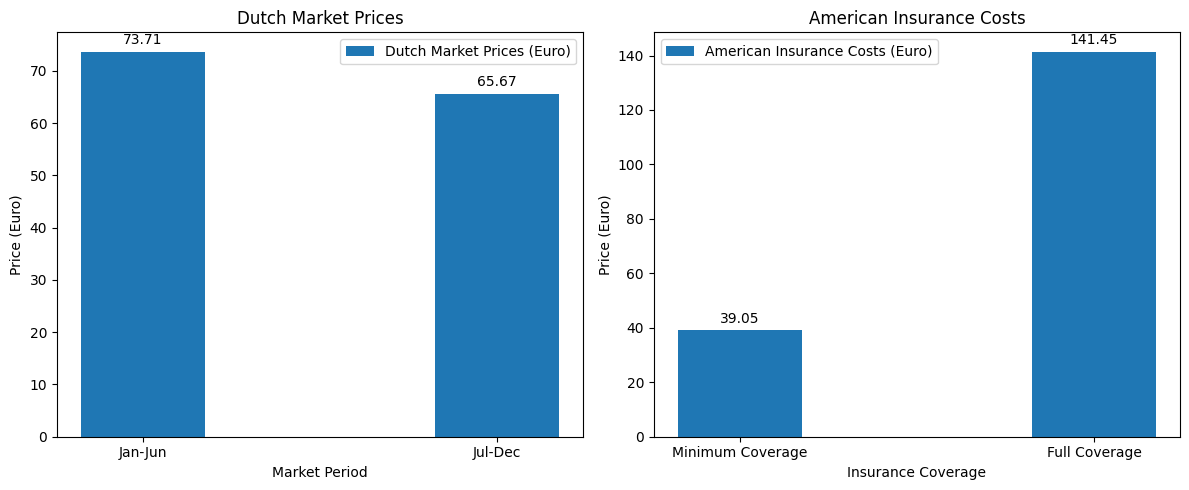

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Data
market_periods = ['Jan-Jun', 'Jul-Dec']
dutch_market_prices_euro = [73.71, 65.67]
american_insurance_costs_euro = [39.05, 141.45]

# Set the width of the bars
bar_width = 0.35
index = np.arange(len(market_periods))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot Dutch market prices
dutch_bars = ax1.bar(index, dutch_market_prices_euro, bar_width, label='Dutch Market Prices (Euro)')
ax1.set_xlabel('Market Period')
ax1.set_ylabel('Price (Euro)')
ax1.set_title('Dutch Market Prices')
ax1.set_xticks(index)
ax1.set_xticklabels(market_periods)
ax1.legend()

# Plot American insurance costs
american_bars = ax2.bar(index, american_insurance_costs_euro, bar_width, label='American Insurance Costs (Euro)')
ax2.set_xlabel('Insurance Coverage')
ax2.set_ylabel('Price (Euro)')
ax2.set_title('American Insurance Costs')
ax2.set_xticks(index)
ax2.set_xticklabels(['Minimum Coverage', 'Full Coverage'])
ax2.legend()

# Add values on top of the bars
def add_values_on_bars(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_on_bars(dutch_bars, ax1)
add_values_on_bars(american_bars, ax2)

plt.tight_layout()
plt.show()
 

Full-coverage car insurance means your policy has comprehensive and collision coverage, as well as liability coverage

Intense Competition – Market is highly saturated with insurance agents

The trade-off is usually that large companies have financial strength and wide availability. On the other hand, small companies can have a better customer experience.

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140


In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.
